In [5]:
import pickle 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_pickle('../1000_playlists.pkl')
df.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,spotify_id,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
0,64071,0,Apocalyptica,spotify:track:0t9Jd84JnsV8HRMaQzHUom,spotify:artist:4Lm0pUvmisUHMdoky5ch2I,I Don't Care,spotify:album:6Gk4CmJVnzK5DQ0CVyfPbB,221480,Worlds Collide,0t9Jd84JnsV8HRMaQzHUom,...,0.0799,0.336,179.076,audio_features,0t9Jd84JnsV8HRMaQzHUom,spotify:track:0t9Jd84JnsV8HRMaQzHUom,https://api.spotify.com/v1/tracks/0t9Jd84JnsV8...,https://api.spotify.com/v1/audio-analysis/0t9J...,221480,4
3,139950,27,Apocalyptica,spotify:track:0t9Jd84JnsV8HRMaQzHUom,spotify:artist:4Lm0pUvmisUHMdoky5ch2I,I Don't Care,spotify:album:6Gk4CmJVnzK5DQ0CVyfPbB,221480,Worlds Collide,0t9Jd84JnsV8HRMaQzHUom,...,0.0799,0.336,179.076,audio_features,0t9Jd84JnsV8HRMaQzHUom,spotify:track:0t9Jd84JnsV8HRMaQzHUom,https://api.spotify.com/v1/tracks/0t9Jd84JnsV8...,https://api.spotify.com/v1/audio-analysis/0t9J...,221480,4
6,91884,102,Apocalyptica,spotify:track:0t9Jd84JnsV8HRMaQzHUom,spotify:artist:4Lm0pUvmisUHMdoky5ch2I,I Don't Care,spotify:album:6Gk4CmJVnzK5DQ0CVyfPbB,221480,Worlds Collide,0t9Jd84JnsV8HRMaQzHUom,...,0.0799,0.336,179.076,audio_features,0t9Jd84JnsV8HRMaQzHUom,spotify:track:0t9Jd84JnsV8HRMaQzHUom,https://api.spotify.com/v1/tracks/0t9Jd84JnsV8...,https://api.spotify.com/v1/audio-analysis/0t9J...,221480,4
9,64071,1,Three Days Grace,spotify:track:4Rtc87aysfzgqRMFcSqWme,spotify:artist:2xiIXseIJcq3nG7C8fHeBj,Life Starts Now,spotify:album:0vv1zKShlm7WuawEup5Mf4,188080,Life Starts Now,4Rtc87aysfzgqRMFcSqWme,...,0.1430,0.323,162.064,audio_features,4Rtc87aysfzgqRMFcSqWme,spotify:track:4Rtc87aysfzgqRMFcSqWme,https://api.spotify.com/v1/tracks/4Rtc87aysfzg...,https://api.spotify.com/v1/audio-analysis/4Rtc...,188080,3
10,64071,2,Three Days Grace,spotify:track:6ymUtM7abyYOiQtv3GRzm4,spotify:artist:2xiIXseIJcq3nG7C8fHeBj,The Chain,spotify:album:5qiu8r3VFkpH8LOhECZiHs,230253,Lost In You EP,6ymUtM7abyYOiQtv3GRzm4,...,0.3360,0.350,155.944,audio_features,6ymUtM7abyYOiQtv3GRzm4,spotify:track:6ymUtM7abyYOiQtv3GRzm4,https://api.spotify.com/v1/tracks/6ymUtM7abyYO...,https://api.spotify.com/v1/audio-analysis/6ymU...,230253,4


In [7]:
samples = np.random.randint(low=1, high=50000, size=30)
y = df.iloc[samples]
df = df.drop(df.index[samples])
print(samples)

[17636 15280  1214 28020 27637 17912 47744 16450 38483  9485 34986  4037
 15158  4781 47068 32949 48272  5424  3845 21705 38010 28858 48474 27889
 38519  1016  2630 31984 44522 46607]


In [8]:
columns = ['danceability', 
          'energy', 'loudness', 
          'speechiness', 'acousticness','instrumentalness', 'liveness', 
          'valence', 'tempo', 'duration_ms_x']

df_std = stats.zscore(df[columns])

Clusters: 1
Clusters: 2
Clusters: 3
Clusters: 4
Clusters: 5
Clusters: 6
Clusters: 7
Clusters: 8
Clusters: 9
Clusters: 10
Clusters: 11
Clusters: 12
Clusters: 13
Clusters: 14
Clusters: 15
Clusters: 16
Clusters: 17
Clusters: 18
Clusters: 19


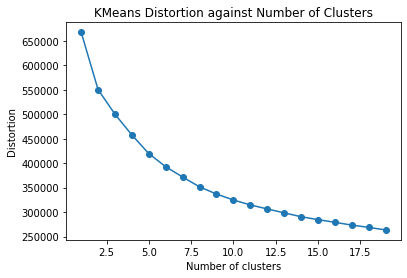

In [9]:
# Inspiration from: https://dev.to/nexttech/k-means-clustering-with-scikit-learn-14kk

distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_std)
    distortions.append(km.inertia_)
    print("Clusters: " + str(i))

plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('KMeans Distortion against Number of Clusters')
plt.show()

In [10]:
# Select 10 clusters
km = KMeans(
        n_clusters=10, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
km.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

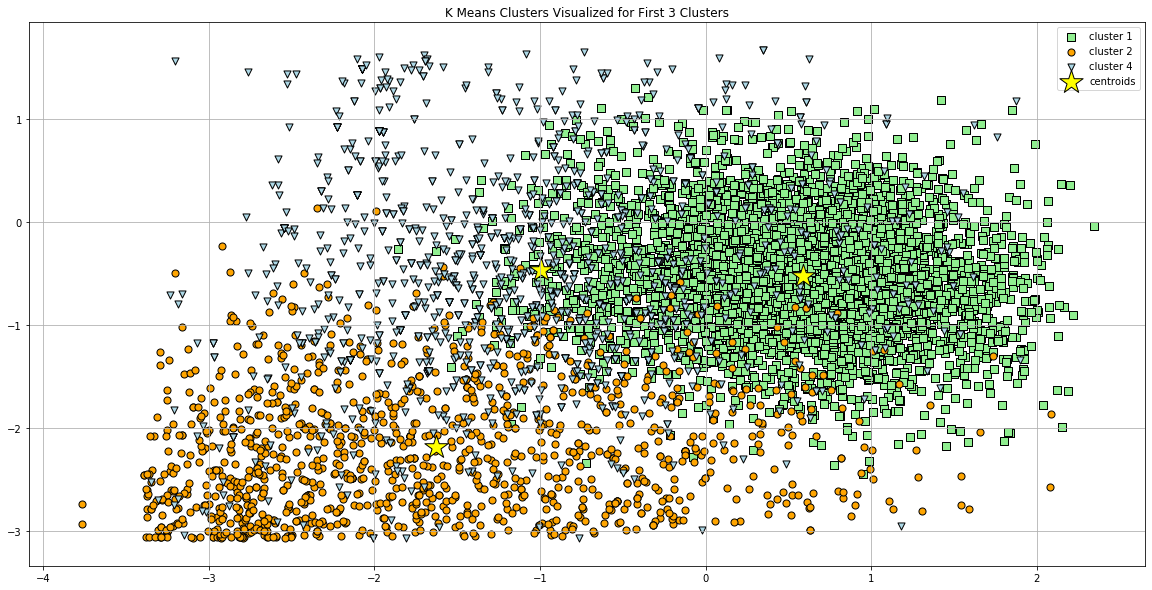

In [11]:
y_km = km.predict(df_std)
df['cluster'] = y_km

plt.figure(figsize=(20,10))

plt.scatter(df_std[y_km == 0, 0], df_std[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')

plt.scatter(df_std[y_km == 1, 0], df_std[y_km == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')

plt.scatter(df_std[y_km == 2, 0], df_std[y_km == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 4')

plt.scatter(km.cluster_centers_[0, 0], km.cluster_centers_[0, 1],s=600, marker='*',c='yellow', edgecolor='black',label='centroids')

plt.scatter(km.cluster_centers_[1, 0], km.cluster_centers_[1, 1],s=600, marker='*',c='yellow', edgecolor='black')

plt.scatter(km.cluster_centers_[2, 0], km.cluster_centers_[2, 1],s=600, marker='*',c='yellow', edgecolor='black')

plt.title('K Means Clusters Visualized for First 3 Clusters')
plt.legend()
plt.grid()
plt.show()

In [12]:
y_std = stats.zscore(y[columns])
predictions = km.predict(y_std)

In [13]:
predictions

array([8, 7, 7, 4, 5, 5, 0, 7, 3, 0, 7, 6, 7, 5, 1, 3, 4, 4, 4, 8, 5, 3,
       6, 6, 3, 7, 5, 5, 9, 8], dtype=int32)

In [14]:
y['cluster'] = predictions

In [15]:
# Create new playlist
suggested_playlist = pd.DataFrame()

for index, row in y.iterrows():
    suggested_playlist = suggested_playlist.append(df[df['cluster'] == row['cluster']].sample())

In [16]:
suggested_playlist

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,spotify_id,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,cluster
362342,136973,35,The Front Bottoms,spotify:track:3AWyIxWrWWa9lM1wk8hmKn,spotify:artist:5ictveRyhWRs8Gt8Dvt1hS,Peach,spotify:album:3Whyz0vsFG5AdcSzlgC3k0,185853,Talon Of The Hawk,3AWyIxWrWWa9lM1wk8hmKn,...,0.4620,139.876,audio_features,3AWyIxWrWWa9lM1wk8hmKn,spotify:track:3AWyIxWrWWa9lM1wk8hmKn,https://api.spotify.com/v1/tracks/3AWyIxWrWWa9...,https://api.spotify.com/v1/audio-analysis/3AWy...,185853,4,8
319060,52490,6,Kelsea Ballerini,spotify:track:40XHORpTeMwJ2hwpKhpRqW,spotify:artist:3RqBeV12Tt7A8xH3zBDDUF,Dibs,spotify:album:2H6xesu7JV1YEO1FvwxKZG,183960,The First Time,40XHORpTeMwJ2hwpKhpRqW,...,0.6820,88.002,audio_features,40XHORpTeMwJ2hwpKhpRqW,spotify:track:40XHORpTeMwJ2hwpKhpRqW,https://api.spotify.com/v1/tracks/40XHORpTeMwJ...,https://api.spotify.com/v1/audio-analysis/40XH...,183960,4,7
312997,135262,6,Imagine Dragons,spotify:track:4IWAyPf1KMq7JCyGeCjTeH,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Whatever It Takes,spotify:album:5GlPAy2PRJW06GVFhKwGTl,201240,Evolve,4IWAyPf1KMq7JCyGeCjTeH,...,0.5370,134.955,audio_features,4IWAyPf1KMq7JCyGeCjTeH,spotify:track:4IWAyPf1KMq7JCyGeCjTeH,https://api.spotify.com/v1/tracks/4IWAyPf1KMq7...,https://api.spotify.com/v1/audio-analysis/4IWA...,201240,4,7
187816,127694,33,Department Of Eagles,spotify:track:6OyctS0xBhfNdMYUU4VWJR,spotify:artist:0d2BmAcZ7p8vrtBPY48WMW,Too Little Too Late,spotify:album:5CwEWK0SwCmdhpsjcCQ9yX,250390,No One Does It Like You,6OyctS0xBhfNdMYUU4VWJR,...,0.2720,84.391,audio_features,6OyctS0xBhfNdMYUU4VWJR,spotify:track:6OyctS0xBhfNdMYUU4VWJR,https://api.spotify.com/v1/tracks/6OyctS0xBhfN...,https://api.spotify.com/v1/audio-analysis/6Oyc...,250390,4,4
347468,52618,26,Astrid S,spotify:track:60lwJa695S26FsYbhCVFVa,spotify:artist:3AVfmawzu83sp94QW7CEGm,Hurts So Good,spotify:album:5xzkyCZ5LEOmI3a3bvrNIa,208728,Astrid S,60lwJa695S26FsYbhCVFVa,...,0.4170,120.141,audio_features,60lwJa695S26FsYbhCVFVa,spotify:track:60lwJa695S26FsYbhCVFVa,https://api.spotify.com/v1/tracks/60lwJa695S26...,https://api.spotify.com/v1/audio-analysis/60lw...,208729,4,5
364178,102790,33,Carrie Underwood,spotify:track:1CXZNbojIVKJNBCd4jgr8c,spotify:artist:4xFUf1FHVy696Q1JQZMTRj,The Night Before (Life Goes On),spotify:album:0kys2jaKAiDPfNBd4z7LAg,234773,Some Hearts,1CXZNbojIVKJNBCd4jgr8c,...,0.3870,97.083,audio_features,1CXZNbojIVKJNBCd4jgr8c,spotify:track:1CXZNbojIVKJNBCd4jgr8c,https://api.spotify.com/v1/tracks/1CXZNbojIVKJ...,https://api.spotify.com/v1/audio-analysis/1CXZ...,234773,4,5
350162,121840,51,The Beach Boys,spotify:track:5xlS0QkVrSH7ssEbBgBzbM,spotify:artist:3oDbviiivRWhXwIE8hxkVV,Little Saint Nick,spotify:album:67nqYhvjDyJXGD64937Lw3,118840,The Beach Boys' Christmas Album,5xlS0QkVrSH7ssEbBgBzbM,...,0.9710,130.594,audio_features,5xlS0QkVrSH7ssEbBgBzbM,spotify:track:5xlS0QkVrSH7ssEbBgBzbM,https://api.spotify.com/v1/tracks/5xlS0QkVrSH7...,https://api.spotify.com/v1/audio-analysis/5xlS...,118840,4,0
229403,9846,19,Usher,spotify:track:0XUfyU2QviPAs6bxSpXYG4,spotify:artist:23zg3TcAtWQy7J6upgbUnj,Yeah!,spotify:album:0vO0b1AvY49CPQyVisJLj0,250373,Confessions,0XUfyU2QviPAs6bxSpXYG4,...,0.5920,104.997,audio_features,0XUfyU2QviPAs6bxSpXYG4,spotify:track:0XUfyU2QviPAs6bxSpXYG4,https://api.spotify.com/v1/tracks/0XUfyU2QviPA...,https://api.spotify.com/v1/audio-analysis/0XUf...,250373,4,7
161022,43949,103,Cardi B,spotify:track:5XdHz3HfGGOsvdhe06oxts,spotify:artist:4kYSro6naA4h99UJvo89HB,Lick,spotify:album:47IM97GbpNyDREWlr2HtNM,233793,Gangsta Bitch Music Vol. 2,5XdHz3HfGGOsvdhe06oxts,...,0.3520,116.077,audio_features,5XdHz3HfGGOsvdhe06oxts,spotify:track:5XdHz3HfGGOsvdhe06oxts,https://api.spotify.com/v1/tracks/5XdHz3HfGGOs...,https://api.spotify.com/v1/audio-analysis/5XdH...,233793,4,3
131548,119264,10,Jason Aldean,spotify:track:1jvUrVUMm1U2XfXX534fRP,spotify:artist:3FfvYsEGaIb52QPXhg4DcH,Big Green Tractor,spotify:album

In [17]:
y

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,spotify_id,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,cluster
207749,127053,34,Modern Baseball,spotify:track:2J1t2b8xPBqZzj5znx0C7C,spotify:artist:1HxXNvsraqrsgfmju1yKk8,Your Graduation,spotify:album:7Jg2tDzP6qZQHO2A37m2ab,163760,You're Gonna Miss It All,2J1t2b8xPBqZzj5znx0C7C,...,0.6320,184.737,audio_features,2J1t2b8xPBqZzj5znx0C7C,spotify:track:2J1t2b8xPBqZzj5znx0C7C,https://api.spotify.com/v1/tracks/2J1t2b8xPBqZ...,https://api.spotify.com/v1/audio-analysis/2J1t...,163760,4,8
190305,169043,30,Reik,spotify:track:2SSYqDX8KTgy01NlqtUo0F,spotify:artist:0vR2qb8m9WHeZ5ByCbimq2,Ya Me Enteré (feat. Nicky Jam) - Urban Version,spotify:album:6Tap30zqzXj22sVKoy1GUj,219226,Des/Amor,2SSYqDX8KTgy01NlqtUo0F,...,0.7970,114.679,audio_features,2SSYqDX8KTgy01NlqtUo0F,spotify:track:2SSYqDX8KTgy01NlqtUo0F,https://api.spotify.com/v1/tracks/2SSYqDX8KTgy...,https://api.spotify.com/v1/audio-analysis/2SSY...,219227,5,7
11675,156293,22,Ashlee Simpson,spotify:track:7yXibbAYi4to5oQTeO738f,spotify:artist:4hqDqHtBlgxXpLXVYf7c8L,Pieces Of Me,spotify:album:0w11HUk0hE4WZ95Bvp6vNI,217440,Autobiography,7yXibbAYi4to5oQTeO738f,...,0.7590,87.183,audio_features,7yXibbAYi4to5oQTeO738f,spotify:track:7yXibbAYi4to5oQTeO738f,https://api.spotify.com/v1/tracks/7yXibbAYi4to...,https://api.spotify.com/v1/audio-analysis/7yXi...,217440,4,7
283072,84580,1,Dawes,spotify:track:6mPpHS9ocuKjsehu8NgD7r,spotify:artist:0CDUUM6KNRvgBFYIbWxJwV,When My Time Comes,spotify:album:4MOqQxavDCkaWKWCEpU6kZ,308373,North Hills,6mPpHS9ocuKjsehu8NgD7r,...,0.4070,115.027,audio_features,6mPpHS9ocuKjsehu8NgD7r,spotify:track:6mPpHS9ocuKjsehu8NgD7r,https://api.spotify.com/v1/tracks/6mPpHS9ocuKj...,https://api.spotify.com/v1/audio-analysis/6mPp...,308373,4,4
280138,143022,156,Alicia Keys,spotify:track:3XVBdLihbNbxUwZosxcGuJ,spotify:artist:3DiDSECUqqY1AuBP8qtaIa,If I Ain't Got You,spotify:album:6TqRKHLjDu5QZuC8u5Woij,228706,The Diary Of Alicia Keys,3XVBdLihbNbxUwZosxcGuJ,...,0.1660,118.393,audio_features,3XVBdLihbNbxUwZosxcGuJ,spotify:track:3XVBdLihbNbxUwZosxcGuJ,https://api.spotify.com/v1/tracks/3XVBdLihbNbx...,https://api.spotify.com/v1/audio-analysis/3XVB...,228707,3,5
209930,125343,14,T-Pain,spotify:track:4gFXY5yvHayGckJndafYQE,spotify:artist:3aQeKQSyrW4qWr35idm0cy,Buy U a Drank (Shawty Snappin'),spotify:album:1fXu5FuLGSpQdmG5SWJfXL,227960,Epiphany,4gFXY5yvHayGckJndafYQE,...,0.6120,80.028,audio_features,4gFXY5yvHayGckJndafYQE,spotify:track:4gFXY5yvHayGckJndafYQE,https://api.spotify.com/v1/tracks/4gFXY5yvHayG...,https://api.spotify.com/v1/audio-analysis/4gFX...,227960,4,5
352338,45158,24,Ariel Camacho y Los Plebes Del Rancho,spotify:track:7CN0vEUkzLg4AYUL8AK38M,spotify:artist:2Lxa3SFNEW0alfRvtdXOul,El Corrido del Dorian,spotify:album:2ReeGlHU8J7gkxsMGlpNhY,301018,El Karma (Deluxe Version),7CN0vEUkzLg4AYUL8AK38M,...,0.8080,111.055,audio_features,7CN0vEUkzLg4AYUL8AK38M,spotify:track:7CN0vEUkzLg4AYUL8AK38M,https://api.spotify.com/v1/tracks/7CN0vEUkzLg4...,https://api.spotify.com/v1/audio-analysis/7CN0...,301018,3,0
198706,194073,44,Kenny Chesney,spotify:track:1dgWTMoHwTUnQhOQ8SR5fV,spotify:artist:3grHWM9bx2E9vwJCdlRv9O,American Kids,spotify:album:2R5PAxygJ4YeRuSwoalKam,182960,The Big Revival,1dgWTMoHwTUnQhOQ8SR5fV,...,0.8670,170.097,audio_features,1dgWTMoHwTUnQhOQ8SR5fV,spotify:track:1dgWTMoHwTUnQhOQ8SR5fV,https://api.spotify.com/v1/tracks/1dgWTMoHwTUn...,https://api.spotify.com/v1/audio-analysis/1dgW...,182960,4,7
329541,72666,45,Digable Planets,spotify:track:26q6YTrXt9l8qshIveiTX9,spotify:artist:0gqIrDRL7CEPBWMmkuZPdQ,Rebirth of Slick (Cool Like Dat),spotify:album:5snUbps5KleLIP0cVI72lP,261266,Reachin' (A New Refutation Of Time And Space),26q6YTrXt9l8qshIveiTX9,...,0.5710,98.315,audio_features,26q6YTrXt9l8qshIveiTX9,spotify:track:26q6YTrXt9l8qshIveiTX9,https://api.spotify.com/v1/tracks/26q6YTrXt9l8...,https://api.spotify.com/v1/audio-analysis/26q6...,261267,4,3
130090,169321,8